# High dimensional data
Based on the results from Random Matrix Theory, if the data is has a very high dimension $p$ in comparison to the datapoints $n$, such that $n/p = c$ for $n, p \to \infty$, clustering based on distances becomes almost worthless, as they are close to identical.
We will take a look at this in this notebook.

In [18]:
import sys
sys.path.append("..")
from data_generation import generate_gmm_data_fixed_means
import numpy as np
import seaborn as sns
from sklearn.metrics import pairwise_distances, normalized_mutual_info_score
import matplotlib.pyplot as plt
from estimators import SoeKmeans, OrdinalTangles
from questionnaire import Questionnaire

In [15]:
def gen_data(n, p, seed = 2):
    return generate_gmm_data_fixed_means(n, np.array([[2] + [0] * (p-1), [-2] + [0] * (p-1)]), 1, seed)

We will inspect the data. We can directly see, that for high dimensions $p$ compared to $n$, the gram matrix looks like a uniform distribution.
This effect increases when we keep the ratio constant and increase both p and n.

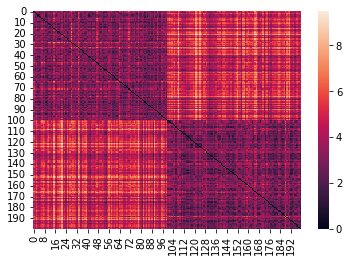

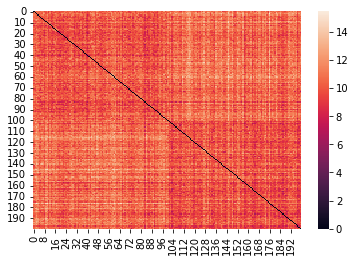

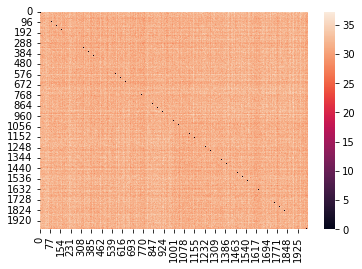

In [16]:
# small dimension 
sns.heatmap(pairwise_distances(gen_data(100, 5).xs))
plt.show()
# large dimension
sns.heatmap(pairwise_distances(gen_data(100, 50).xs))
plt.show()
sns.heatmap(pairwise_distances(gen_data(1000, 500).xs))
plt.show()

In [35]:
n = 100
p = 50
data = gen_data(n, p)
q = Questionnaire.from_metric(data.xs, density=0.005)
tangles = OrdinalTangles(n/3)
yt = tangles.fit_predict(q.values)
print(f"NMI Tangles: {normalized_mutual_info_score(yt, data.ys)} ({np.unique(yt).size})")

ysoe = SoeKmeans(2, n_clusters=2).fit_predict(*q.to_bool_array())
print(f"NMI SOE: {normalized_mutual_info_score(ysoe, data.ys)}")

Generating questionnaire...
Generating question set...
Filling out questionnaire...


100%|██████████| 200/200 [00:00<00:00, 11180.64it/s]

NMI Tangles: 0.6313350115276466 (2)


NMI SOE: 0.785687017277145
